### 1. Matplotlib - 기본 그래프 도구
* Matplotlib은 파이썬 표준 시각화 도구라고 부를 수 있을 정도로 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원한다.

#### 1-1. 선 그래프
* 선 그래프(line plot)는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다.
* 특히 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.

In [1]:
# 선 그래프
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

In [2]:
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [3]:
print(df_seoul.head(8))

            1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   

            1977     1978     1979  ...     2008     2009     2010     2011  \
전입지                                 ...                                       
전국       2678007  3028911  2441242  ...  2083352  1925452  1848038  1834806   
부산광역시      27213    29

In [4]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

In [5]:
print(sr_one.head(8))

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
Name: 경기도, dtype: object


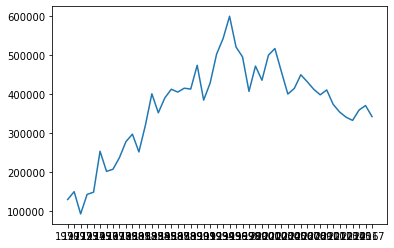

In [6]:
# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

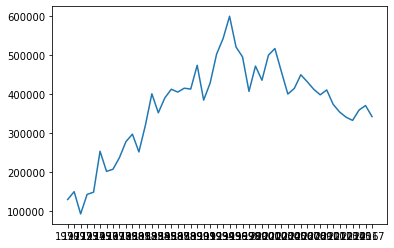

In [7]:
# 시리즈 또는 데이터프레임 객체를 plot() 함수에 직접 입력하는 것도 가능하다.
plt.plot(sr_one)

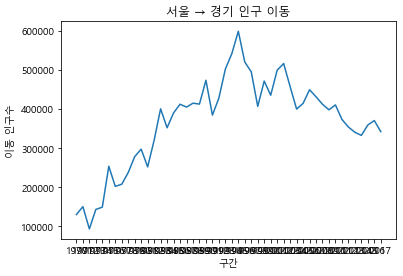

In [8]:
# 차트 제목, 축 이름 추가
# 한글 폰트 오류 해결
plt.rc('font', family='Malgun Gothic')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 → 경기 인구 이동')

# 축 이름 추가
plt.xlabel('구간')
plt.ylabel('이동 인구수')

plt.show()

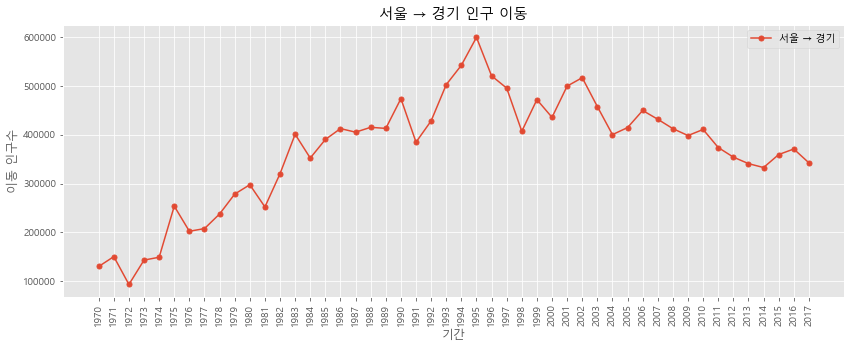

In [9]:
# 그래프 꾸미기
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
# plt.xticks(rotation=90)와 동일
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=5)

plt.title('서울 → 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 → 경기'], loc='best', fontsize=10)    # 범례 표시

plt.show()

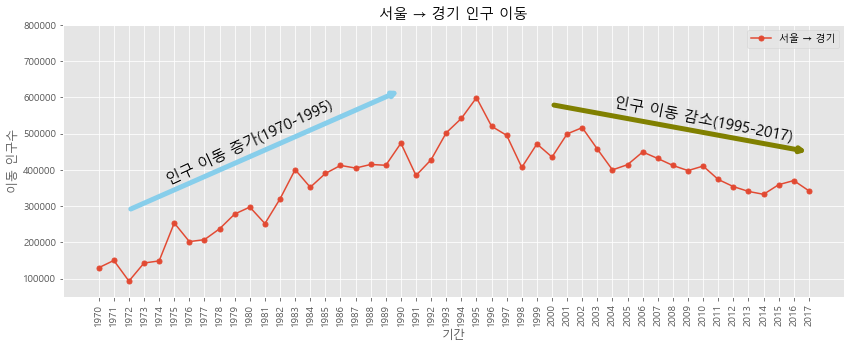

In [10]:
# matplotlib 스타일 리스트 출력
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

# x축 눈금 라벨 회전하기
# plt.xticks(rotation=90)와 동일
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=5)

plt.title('서울 → 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 → 경기'], loc='best', fontsize=10)    # 범례 표시

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20,620000),
             xytext=(2,290000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))

plt.annotate('',
             xy=(47,450000),
             xytext=(30,580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5))

# 주석 표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)',
             xy=(10,360000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15)

plt.annotate('인구 이동 감소(1995-2017)',
             xy=(40,480000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15)

plt.show()

* 1990년대 중반까지 경기도권 5대 신도시(분당, 일산 등) 개발로 서울 인구의 대규모 경기도 유입이 있었음을 추정할 수 있다.
* 이 시기를 정점으로 서울을 벗어나 경기권으로 이동하는 인구는 현재까지 계속 감소하는 트렌드를 보이고 있다.

<ipython-input-13-aa4bb5ca60ff>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
<ipython-input-13-aa4bb5ca60ff>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


[Text(0, 0, '1970'),
 Text(1, 0, '1971'),
 Text(2, 0, '1972'),
 Text(3, 0, '1973'),
 Text(4, 0, '1974'),
 Text(5, 0, '1975'),
 Text(6, 0, '1976'),
 Text(7, 0, '1977'),
 Text(8, 0, '1978'),
 Text(9, 0, '1979'),
 Text(10, 0, '1980'),
 Text(11, 0, '1981'),
 Text(12, 0, '1982'),
 Text(13, 0, '1983'),
 Text(14, 0, '1984'),
 Text(15, 0, '1985'),
 Text(16, 0, '1986'),
 Text(17, 0, '1987'),
 Text(18, 0, '1988'),
 Text(19, 0, '1989'),
 Text(20, 0, '1990'),
 Text(21, 0, '1991'),
 Text(22, 0, '1992'),
 Text(23, 0, '1993'),
 Text(24, 0, '1994'),
 Text(25, 0, '1995'),
 Text(26, 0, '1996'),
 Text(27, 0, '1997'),
 Text(28, 0, '1998'),
 Text(29, 0, '1999'),
 Text(30, 0, '2000'),
 Text(31, 0, '2001'),
 Text(32, 0, '2002'),
 Text(33, 0, '2003'),
 Text(34, 0, '2004'),
 Text(35, 0, '2005'),
 Text(36, 0, '2006'),
 Text(37, 0, '2007'),
 Text(38, 0, '2008'),
 Text(39, 0, '2009'),
 Text(40, 0, '2010'),
 Text(41, 0, '2011'),
 Text(42, 0, '2012'),
 Text(43, 0, '2013'),
 Text(44, 0, '2014'),
 Text(45, 0, '2015')

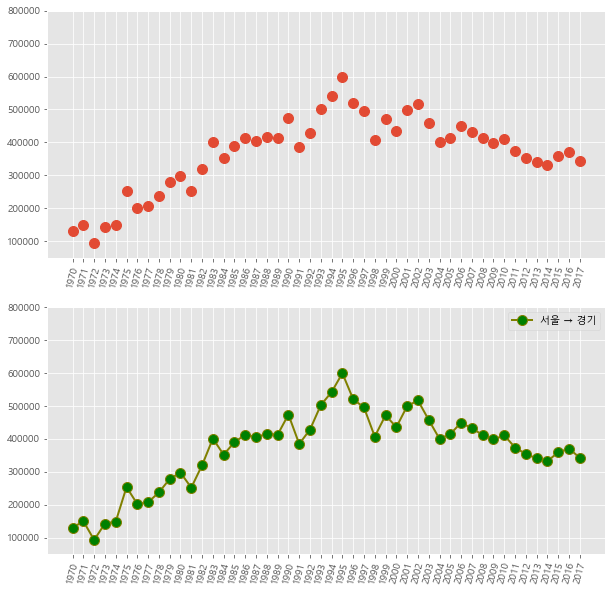

In [13]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# axe 객체에 plot 함수로 그래프 출력
# ax1.plot(sr_one, 'o', markersize=10)    # 'o': 선 그래프가 아니라 점 그래프로 표현
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 → 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

# plt.show()

<ipython-input-18-e78978faeac3>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


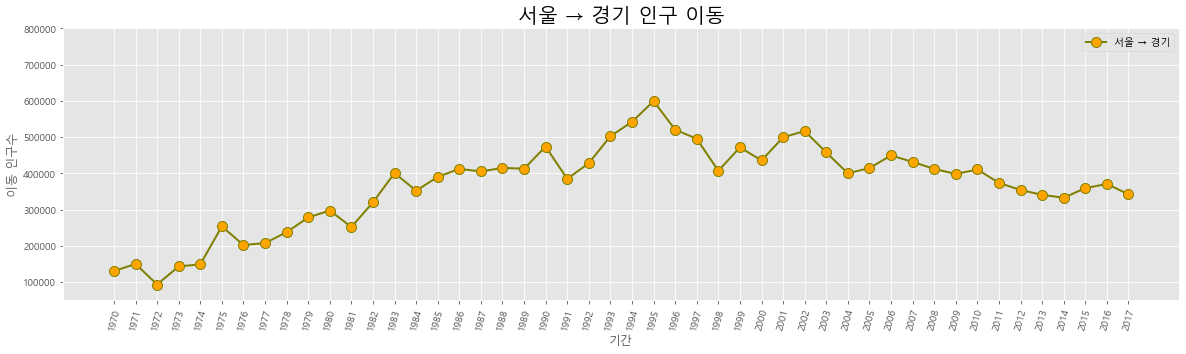

In [18]:
# axe 객체 그래프 꾸미기
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울 → 경기')
ax.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000,800000)

# 차트 제목 추가
ax.set_title('서울 → 경기 인구 이동', size=20)

# 축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

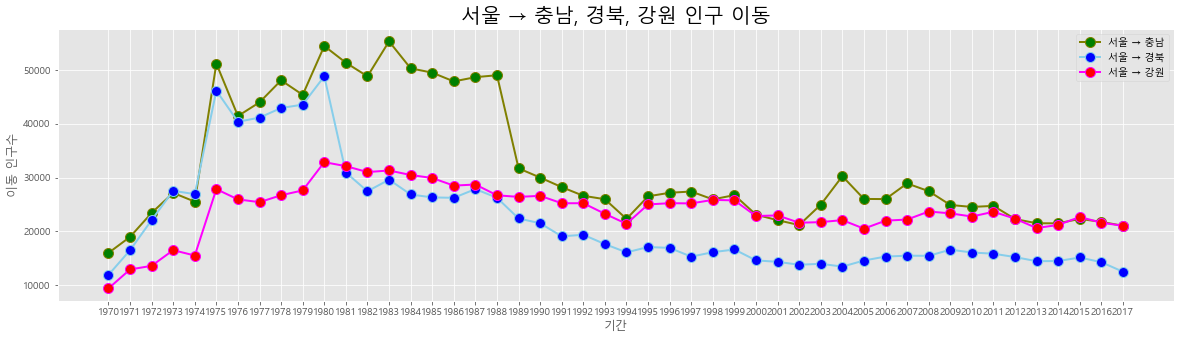

In [24]:
# 같은 화면에 그래프 추가
# 서울에서 '충청남도', '충청북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 → 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 → 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 → 강원')

ax.legend(loc='best')

ax.set_title('서울 → 충남, 경북, 강원 인구 이동', size=20)

ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

* 지리적으로 가까운 충남 지역으로 이동한 인구가 다른 두 지역에 비해 많은 편이다.
* 전반적으로 1970~80년대에는 서울에서 지방으로 전출하는 인구가 많았으나, 1990년 이후로는 줄곧 감소하는 패턴을 보이고 있다.

<ipython-input-27-65e2c45811a9>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
<ipython-input-27-65e2c45811a9>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
<ipython-input-27-65e2c45811a9>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
<ipython-input-27-65e2c45811a9>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


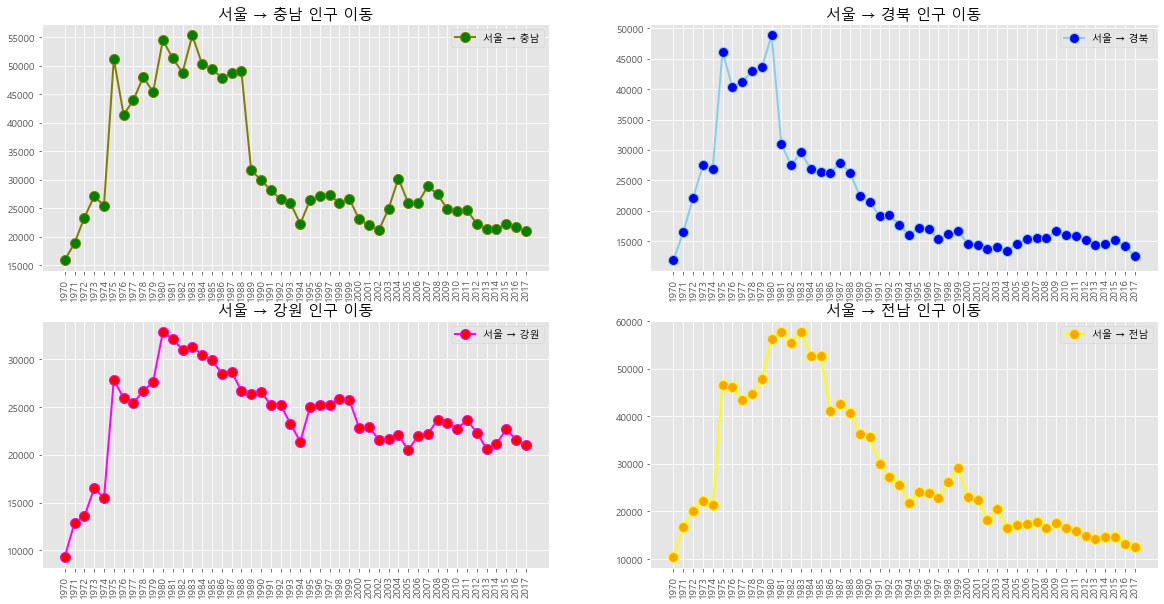

In [27]:
# 화면 4분할 그래프
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

plt.style.use("ggplot")

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 → 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 → 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 → 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize=10, color='yellow', linewidth=2, label='서울 → 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 → 충남 인구 이동', size=15)
ax2.set_title('서울 → 경북 인구 이동', size=15)
ax3.set_title('서울 → 강원 인구 이동', size=15)
ax4.set_title('서울 → 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

#### 1-2. 면적 그래프
* 면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다.

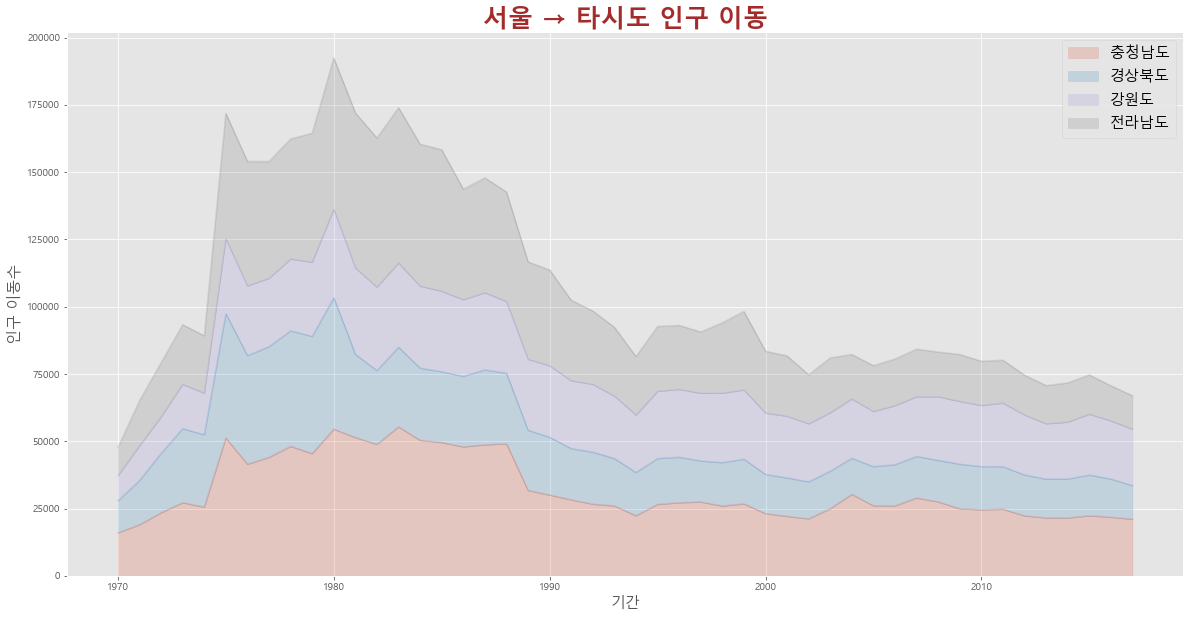

In [38]:
# 면적 그래프
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울 → 타시도 인구 이동', size=25, color='brown', weight='bold')
plt.ylabel('인구 이동수', size=15)
plt.xlabel('기간', size=15)
plt.legend(loc='best', fontsize=15)

plt.show()

#### 1-3. 막대 그래프
* 막대 그래프(bar plot)는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다.

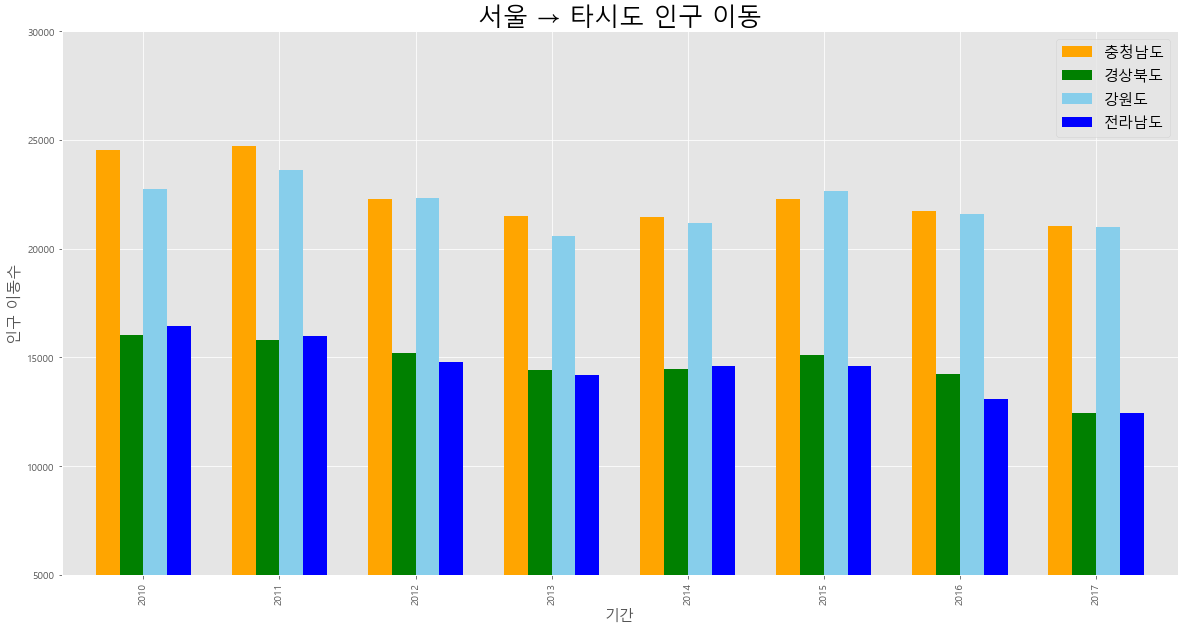

In [44]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울 → 타시도 인구 이동', size=25)
plt.ylabel('인구 이동수', size=15)
plt.xlabel('기간', size=15)
plt.ylim(5000,30000)
plt.legend(loc='best', fontsize=15)

plt.show()

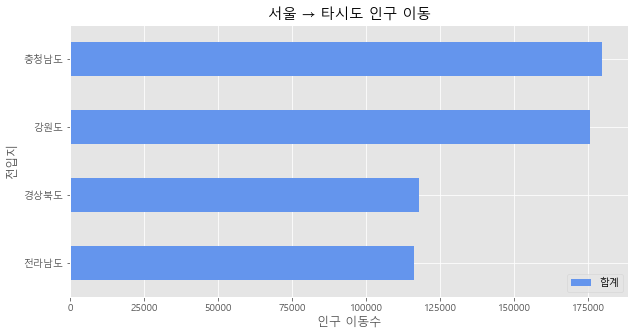

In [54]:
# 가로형 막대 그래프
# 가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합하다.(kind='barh')
col_years = list(map(str, range(2010, 2018)))     
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 행방향 합계를 구할 때는 sum(axis=1) 메서드를 사용한다.
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

plt.style.use('ggplot')
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 → 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('인구 이동수')

plt.show()

<ipython-input-69-03d88b771f99>:10: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)


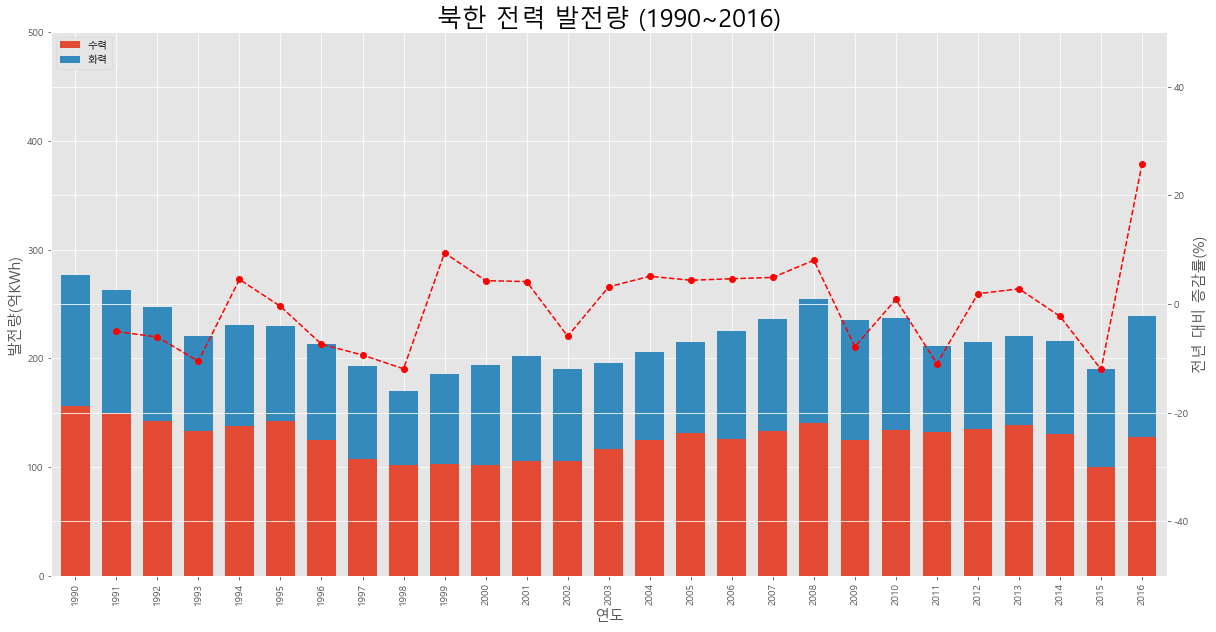

In [69]:
# 보조축 활용하기(2축 그래프 그리기)
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.style.use('ggplot')    # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False    # 마이너스 부호 출력 설정

df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량 - 1년'])-1)*100

# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), width=0.7, stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감률, ls='--', marker='o', color='red', label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=15)
ax1.set_ylabel('발전량(억KWh)',size=15)
ax2.set_ylabel('전년 대비 증감률(%)', size=15)

plt.title('북한 전력 발전량 (1990~2016)', size=25)
ax1.legend(loc='upper left')

plt.show()

* 2015년 수력 발전량이 일시적으로 급감한 사실이 있다. 실제로 2015년에 북한의 가뭄이 심각했다는 뉴스를 찾아볼 수 있다.

#### 1-4. 히스토그램
* 히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.
* x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수를 y축에 표시한다.

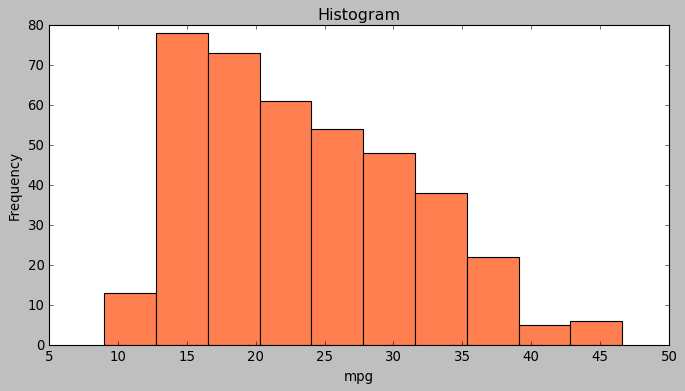

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("classic")

df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

# 그래프 꾸미기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

#### 1-5. 산점도
* 산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타낸다. 이때 각 변수는 연속되는 값을 갖는다.

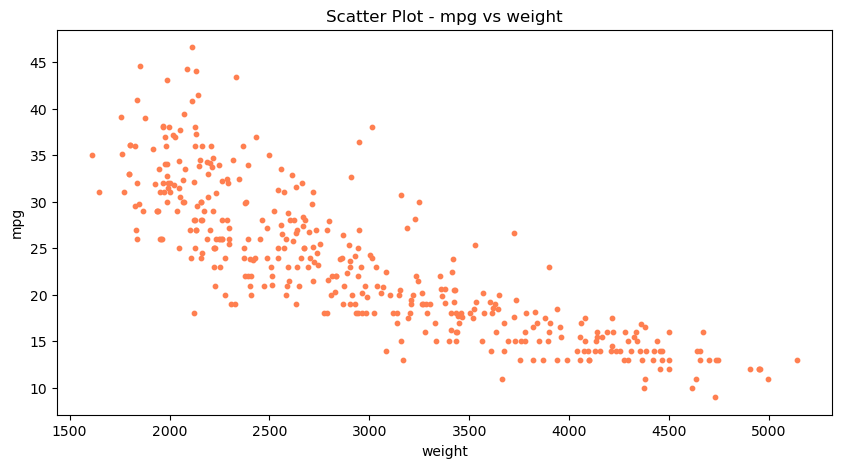

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")

df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

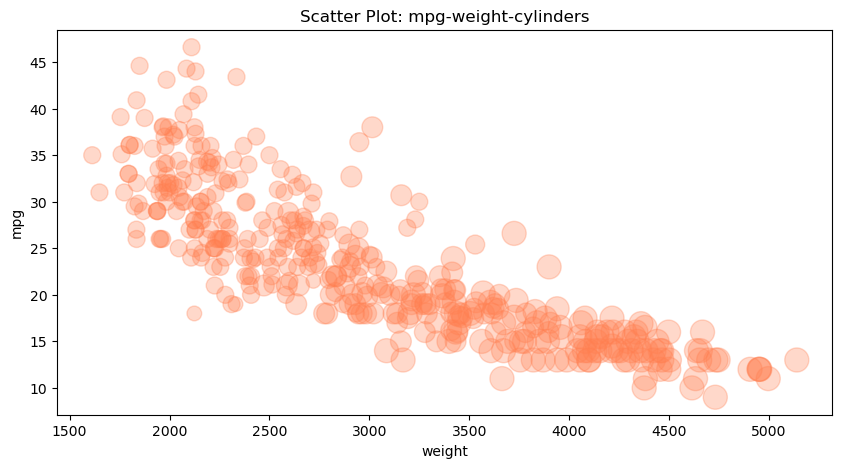

In [76]:
# 버블 차트
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max()*300

# 점의 크기를 정하는 s옵션에 cylinders_size(실린더 개수)를 입력하여 값의 크기에 따라 점의 크기를 값에 따라 다르게 표시한다.
df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10,5), s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

# savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정한다.
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)

plt.show()

#### 1-6. 파이 차트
* 파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다.

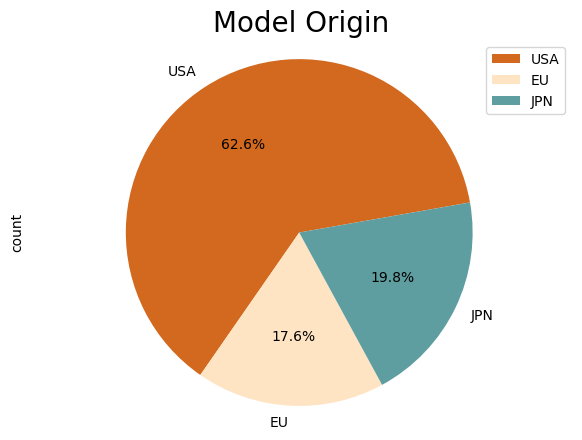

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

df['count']=1
df_origin = df.groupby('origin').sum()

df_origin.index = ['USA', 'EU', 'JPN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
# '%1.1f%%'옵션은 숫자를 퍼센트(%)로 나타내는데, 소수점 이하 첫째자리까지 표기한다는 뜻이다.
df_origin['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['chocolate','bisque','cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

#### 1-7. 박스 플롯
* 박스 플롯(boxplot)은 범주형 데이터의 분포를 파악하는데 적합하다.
* 박스 플롯은 5개의 통계 지표(최소값, 1분위값, 중간값, 3분위값, 최대값)를 제공한다.

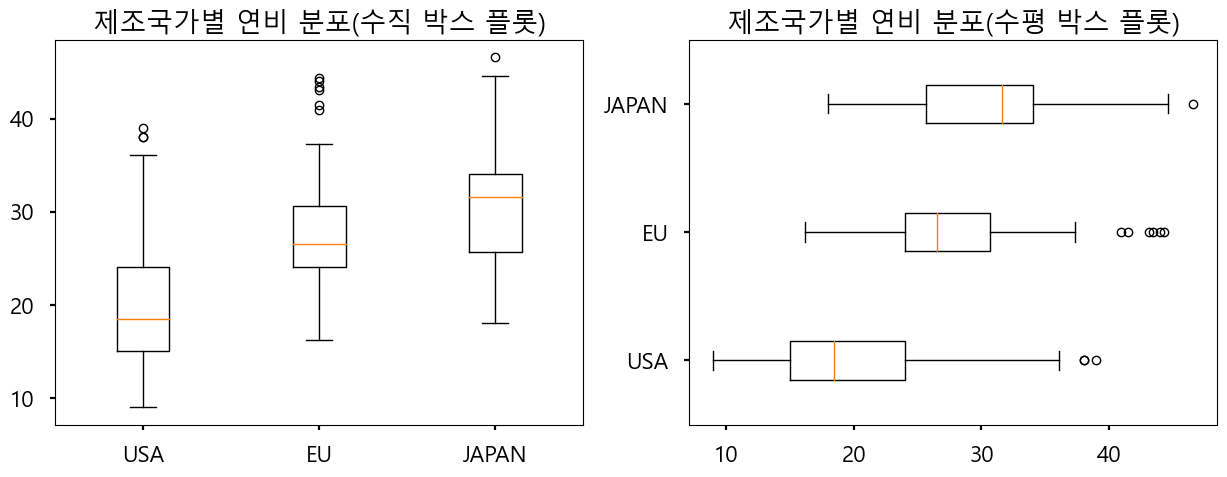

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)    # 수평 박스 플롯

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

### 2. Seaborn 라이브러리 - 고급 그래프 도구

In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

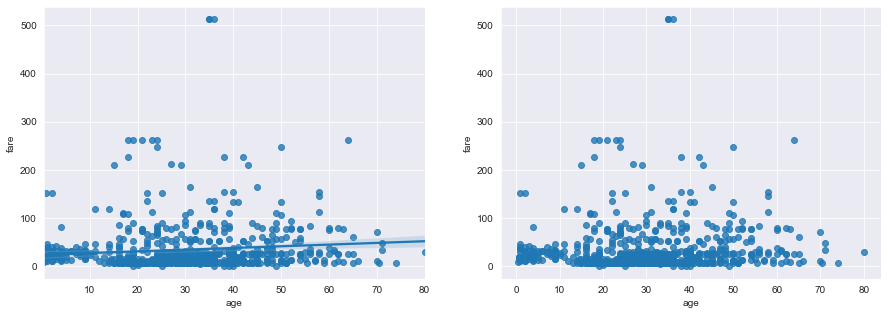

In [1]:
# 회귀선이 있는 산점도
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

plt.show()

* regplot() 함수는 서로 다른 2개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타낸다.

In [4]:
print(titanic[['age', 'fare']])

      age     fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]


C:\Users\dpdnj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


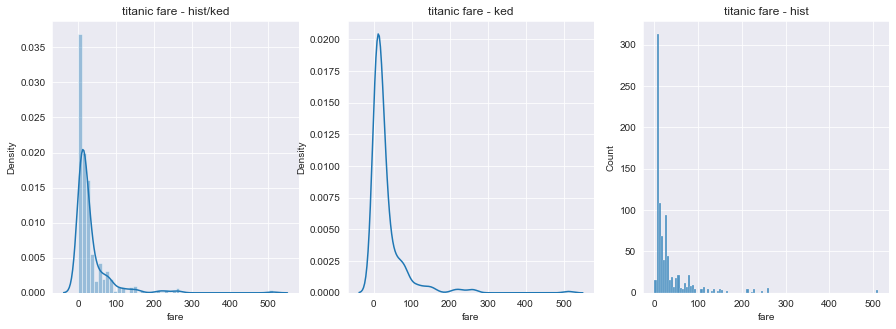

In [5]:
# 히스토그램/커널 밀도 그래프
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'], ax=ax1)
sns.kdeplot(x='fare', data=titanic, ax=ax2)
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

* 단변수(하나의 변수) 데이터의 분포를 확인할 때 distplot() 함수를 이용한다. 기본값으로 히스토그램과 커널 밀도 함수를 그래프로 출력한다.
* 타이타닉의 운임('fare' 열)의 분포를 그리면, 대부분 100달러 미만에 집중되어 있다.

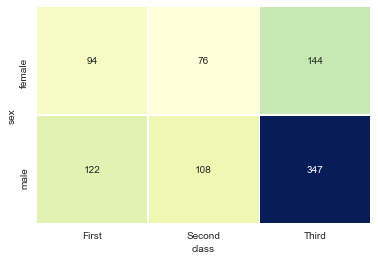

In [9]:
# 히트맵
# 데이터프레임을 피벗테이블로 정리할 때, 한 변수를 행인덱스로 나머지 변수를 열 이름으로 설정한다.
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')

# 히트맵 그리기
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu', linewidth=.5, cbar=False)

plt.show()

* 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류한다.
* 타이타닉호에는 여자(female) 승객보다 남자(male) 승객이 상대적으로 많은 편이다.

C:\Users\dpdnj\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


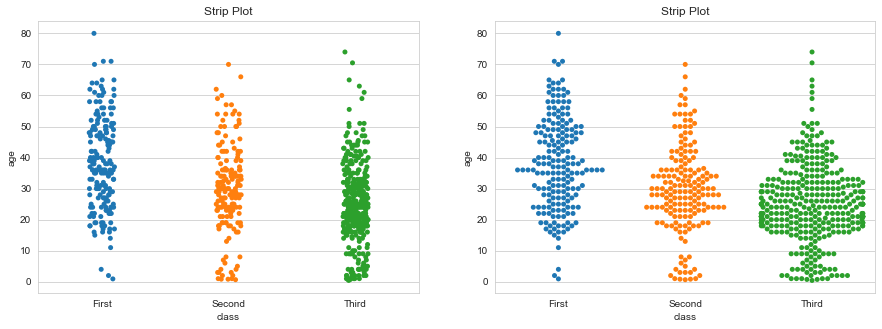

In [10]:
# 범주형 데이터의 산점도
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x="class", y="age", data=titanic, ax=ax1)
sns.swarmplot(x="class", y="age", data=titanic, ax=ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

* swarmplot() 함수는 데이터의 분산까지 고려하여, 데이터 포인트가 서로 중복되지 않도록 그린다.

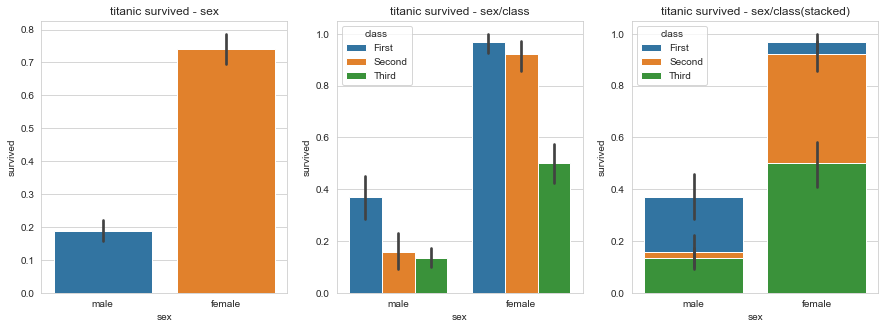

In [11]:
# 막대 그래프
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

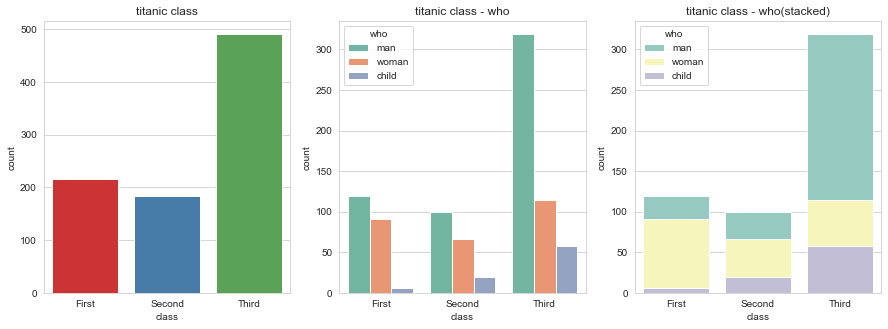

In [14]:
# 빈도 그래프
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 'who' 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)

ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

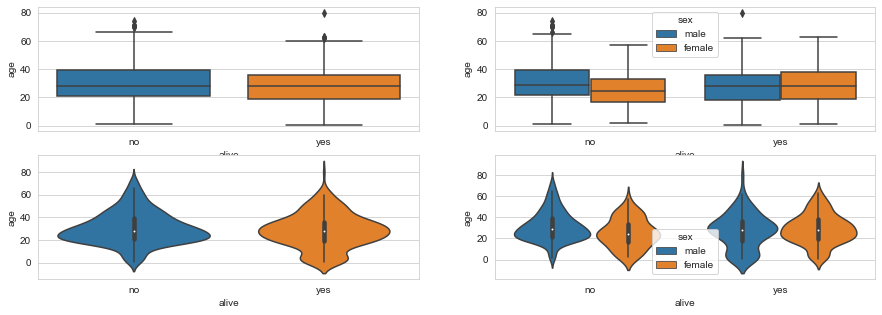

In [15]:
# 박스 플롯/바이올린 그래프
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

Text(0.5, 0.98, 'titanic fare - kde')

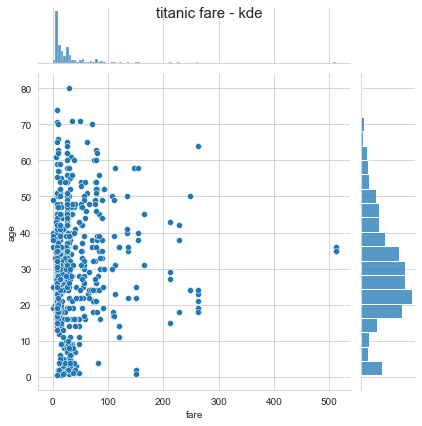

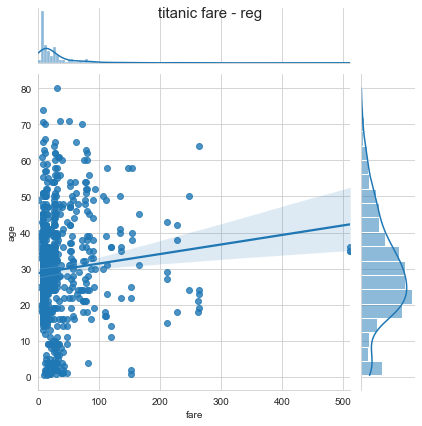

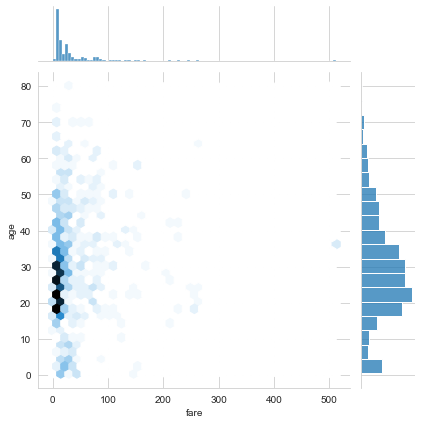

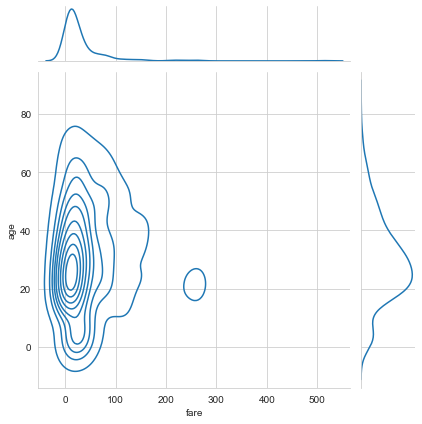

In [17]:
# 조인트 그래프
# jointplot() 함수는 산점도를 기본으로 표시하고, x-y축에 각 변수에 대한 히스토그램을 동시에 보여준다.
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)    # 산점도(기본값)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic)    # 회귀선 추가(kind='reg')
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic)    # 육각 산점도(kind='hex')
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic)    # 커널 밀집그래프(kind='kde')

j1.fig.suptitle('titanic fare - scatter', size=15)
j2.fig.suptitle('titanic fare - reg', size=15)
j1.fig.suptitle('titanic fare - hex', size=15)
j1.fig.suptitle('titanic fare - kde', size=15)

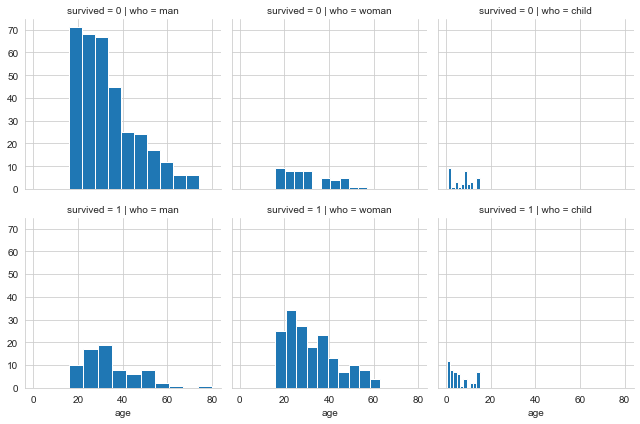

In [18]:
# 조건에 맞게 화면 분할
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')

sns.set_style('whitegrid')

g = sns.FacetGrid(data=titanic, col='who', row='survived')

g = g.map(plt.hist, 'age')

* 남성에 비해 여성 생존자가 상대적으로 많은 편이고, 성인 중에서는 활동성이 좋은 20~40대의 생존자가 많은 것으로 나타난다.

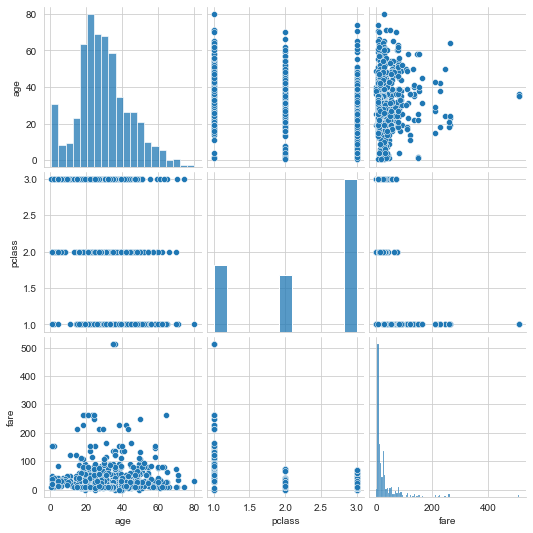

In [19]:
# 이변수 데이터 분포
# pairplot() 함수는 인자로 전달되는 데이터프레임의 열(변수)을 두 개씩 짝을 지을 수 있는 모든 조합에 대해 표현한다.
titanic_pair = titanic[['age','pclass','fare']]

g = sns.pairplot(titanic_pair)

### 3. Folium 라이브러리 - 지도 활용

In [20]:
# 지도 만들기
# Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체를 만들 수 있다. 
import folium

# 서울 지도 만들기
# 지도 객체를 생성하는 Map() 함수의 location 옵션에 [위도,경도] 수치를 입력하면 그 지점을 중심으로 지도를 보여준다.
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul.html')

In [22]:
# 지도 스타일 적용하기
import folium

# 'Stamen Terrain'맵은 산악 지형 등의 지형이 보다 선명하게 드러난다.
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)
# 'Stamen Toner'스타일을 적용한 맵은 흑백 스타일로 도로망을 강조해서 보여준다.
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=15)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul2.html')
seoul_map.save('./seoul3.html')

In [34]:
# 지도에 마커 표시하기
import pandas as pd
import folium

df = pd.read_excel('./서울지역 대학교 위치.xlsx', index_col='학교명', engine='openpyxl')

seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat,lng], popup=name).add_to(seoul_map)

# 지도를 HTML 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

In [37]:
# 지도 영역에 단계구분도 표시하기
# 행정구역과 같이 지도 상의 어떤 경계에 둘러싸인 영역에 색을 칠하거나 음영 등으로 정보를 나타내는 시각화 방법이다.
import pandas as pd
import folium
import json

# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
file_path='./경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col='구분', engine='openpyxl')
df.columns = df.columns.map(str)

geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], tiles='Stamen Terrain', zoom_start=9)

year = '2007'

folium.Choropleth(geo_data=geo_data, data=df[year], columns=[df.index,df[year]], fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3, threshold_scal=[10000,100000,300000,500000,700000], key_on='feature.properties.name').add_to(g_map)

g_map.save('./gyonggi_population_'+year+'.html')